In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
# from numba import jit

from utils import *


%load_ext autoreload
%autoreload 2

# Data sources to investigate

https://datadryad.org/stash/dataset/doi:10.5061/dryad.nk98sf7q7
https://github.com/raeedcho/s1-kinematics


https://datashare.ed.ac.uk/handle/10283/3674
https://www.ntnu.edu/kavli/research/grid-cell-data
https://www.nature.com/articles/s41467-020-17500-1#Sec24


file:///Users/williamgilpin/Downloads/journal.pcbi.1008591.pdf


# Human Connectome Project fMRI data

[Source](https://figshare.com/articles/dataset/hcp_rsfMRI_mat/12084636)

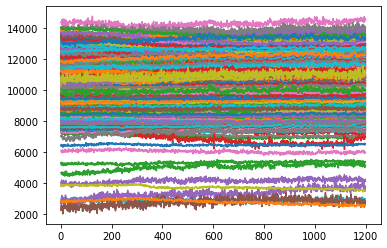

In [326]:
dpath = "/Users/williamgilpin/Downloads/hcp_rsfMRI.mat"

import scipy.io
all_data = scipy.io.loadmat(dpath)
all_data = all_data["dat"]
# (brain parcel, time, 

ee = all_data[:, :, 0].T
plt.plot(ee);
ee.dump("fmri.pkl")

In [135]:
dpath = "/Users/williamgilpin/Downloads/train.csv"
raw_data = pd.read_csv(dpath)
all_data = list()
for i in range(1, 1 + 45):
    all_data.append(np.array(raw_data[raw_data["Store"] == i]["Weekly_Sales"]))
# all_data = np.array(all_data).T

In [142]:
raw_data

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [139]:
raw_data[raw_data["Store"] == i]["Weekly_Sales"]

411933    18628.11
411934    22416.94
411935    28756.53
411936    14656.08
411937    16608.87
            ...   
421565      508.37
421566      628.10
421567     1061.02
421568      760.01
421569     1076.80
Name: Weekly_Sales, Length: 9637, dtype: float64

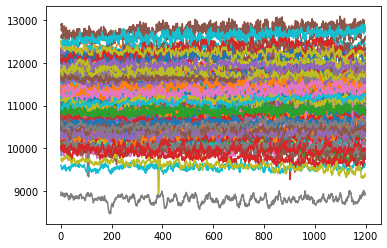

In [329]:
ee = all_data[0, :, :]
plt.plot(ee);
ee.dump("fmri.pkl")

In [162]:
ee = all_data[:, :, 0]
ee.dump("fmri.pkl")

In [ ]:
true_data = np.load("fmri.pkl", allow_pickle=True)


plt.figure()
plt.plot(true_data);

from sklearn.decomposition import PCA
embedding = PCA()
data_pca = embedding.fit_transform(standardize_ts(true_data))
plt.figure()
plt.plot(data_pca[:, 0], 'k')
plt.title("PCA")


plt.figure()
plt.plot(np.median(standardize_ts(true_data), axis=-1))
plt.title("median trend")


model = RecurrenceManifold(weighted_connectivity=True, start="multiple") 
# model = RecurrenceManifold(weighted_connectivity=True, merge="percentile") 
label_vals = model.fit_predict(true_data) 

# model.fit(true_data, root_index=np.argmin(np.mean(standardize_ts(true_data), axis=-1)))
plt.figure()
plt.plot(label_vals, 'k')


In [ ]:
# true_data = np.load("spiktest.pkl", allow_pickle=True)
plt.plot(label_vals[1:], label_vals[:-1], 'k')

# PhysioNet

MIMIC -III vital signs
Good subset [here](https://physionet.org/content/bidmc/1.0.0/)


[Source 2](https://physionet.org/content/cebsdb/1.0.0/)

In [64]:
import wfdb

data_dir = "/Users/williamgilpin/Downloads/bidmc08"
record2 = wfdb.rdrecord(data_dir)
true_data = record2.p_signal[:, 1:]
driver = record2.p_signal[:, 0]
# https://physionet.org/content/bidmc/1.0.0/

# data_dir = "/Users/williamgilpin/Downloads/3600066n"
# record2 = wfdb.rdrecord(data_dir)
# driver = record2.p_signal

# data_dir = "/Users/williamgilpin/Downloads/charis8"
# record2 = wfdb.rdrecord(data_dir)
# true_data = record2.p_signal

# true_data[10000:10000 + 3000].dump("physio.pkl")
# driver[10000:10000 + 3000].dump("physio_drive.pkl")


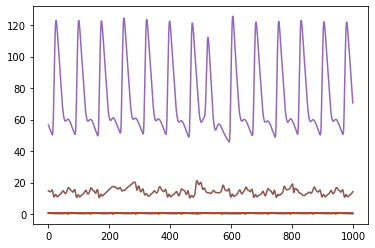

In [69]:
plt.plot(true_data[:1000]);

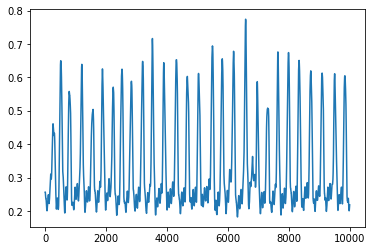

In [66]:
plt.plot(driver[:10000])

In [317]:
driver[10000:10000 + 3000].dump("physio_drive.pkl")

[2008, 48, 400, 72, 4607, 64, 72, 48, 48, 48, 16, 64, 72, 48, 48, 63, 48, 72, 72, 72, 48, 48, 72, 48, 72, 16, 64, 64, 64, 88, 88, 88, 16, 16, 40, 88, 88, 88, 64, 64, 64, 64, 64, 64, 88, 56, 64, 16, 16, 64, 16, 16, 88, 88, 28, 64, 64, 88, 28, 68216, 61, 88, 64, 64, 64, 64, 28, 88, 88, 64, 88, 64, 64, 64, 64, 64]


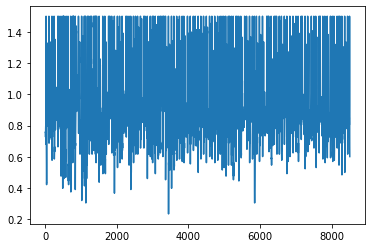

In [267]:
import sys
def find_data(obj):
    """
    Given an unknown object, find which fields data is stored in
    
    TODO: add recursion for nested data structures
    """
    attr_names = dir(obj)
    output = dict()
    for name in attr_names:
        size_val = sys.getsizeof(getattr(obj, name))
        output[name] = size_val
        
    return output


In [339]:
import wfdb

data_dir = "/Users/williamgilpin/Downloads/b013"
record2 = wfdb.rdrecord(data_dir)
true_data0 = record2.p_signal


true_data = true_data0[:, [0,1,3]]
driver =  true_data0[:, 2]

# true_data = record2.p_signal[:, 1:]
# driver = record2.p_signal[:, 0]
# https://physionet.org/content/bidmc/1.0.0/

# data_dir = "/Users/williamgilpin/Downloads/3600066n"
# record2 = wfdb.rdrecord(data_dir)
# driver = record2.p_signal

# data_dir = "/Users/williamgilpin/Downloads/charis8"
# record2 = wfdb.rdrecord(data_dir)
# true_data = record2.p_signal

true_data[::9][100:100 + 3000].dump("physio.pkl")
driver[::9][100:100 + 3000].dump("physio_drive.pkl")

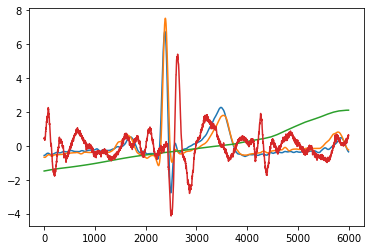

In [334]:
plt.plot(standardize_ts(true_data[:6000]))

## EEG with data

[Source](https://www.nature.com/articles/s41597-021-01046-y)
[Source](https://zenodo.org/record/4456079#.YK8ak6hKiF5)


The physiological (EEG, ECG, EOG) and the behavioral (CTT) data can be time aligned by using triggers sent to the EEG amplifier. The start of the CTT is indicated by the first Block Start trigger (code:02), which can be found in the EEG data once it has been imported for post processing. The start of each stimulation trial is indicated with a stimulation start trigger (code:16). After the stimulation start trigger was delivered, to the stimulator and EEG amplifier, the stimulation current was ramped up over the course of 5 secs until it reached the desired intensity. After 30 secs of stimulation at the desired intensity a stimulation stop trigger (code:32) was delivered to the stimulator and EEG amplifier, and the stimulation intensity was ramped down over the course of 5 secs. This process repeated 4 times for each stimulation enabled block.

In [458]:
## Downsampled dataset
# triggers <- These are all the labeled EEG/Stimulation start/stop triggers
# EEGdata <- Contains the downsampled EEG/ECG/EOG voltage data dims: 35 channelss X ~4E6 samples
# fs <- The downsampled sampling frequency of the data : 1000 Hz
# fsOld <- The original sampling frequency of the data
# time <- Time vector for the data. Should be 1 X ~4E6
# label <- Contains the channel label information. BIP1= ECG, BIP2=EOG, RESP1= N/A
# nchan <- The number of channels in the data
# rate <- Redundant to fs, sampling rate of data
# npt <- Number of data points ~4E6
# Subj <- Subject and session that data belong to. I.e. 0302 - Subject 03 session 03
# ptrackerPerf <- The CTT data deviation/ the behavioral data
# ptrackerTime <- Time vector for the CTT data
# ptrackerfs <- The sampling frequency for the CTT data 100 Hz.

In [29]:
 np.squeeze(all_data0[-]).shape

()

In [20]:
dpath = "/Users/williamgilpin/Downloads/EEG_DS_Struct_0102.mat"
# dpath = "/Users/williamgilpin/Downloads/EEG_DS_Struct_2602.mat"

import scipy.io
all_data0 = scipy.io.loadmat(dpath)
all_data0 = all_data0["DSamp"][0][0]
time_behave = np.squeeze(all_data0[-2])
time_eeg = np.squeeze(all_data0[4])

behavior = np.squeeze(all_data0[-3])[time_behave <= time_eeg[-1]]
time_behave = time_behave[time_behave <= time_eeg[-1]]
from scipy.signal import resample
behavior = resample(behavior, len(time_eeg))
time_behave = resample(time_behave, len(time_eeg))
field_labels = [item[0][0] for item in all_data0[5]]

# letter# = EEG
# BIP = ECG
# Behavior? EOG? RESP?
# EOG = eye tracking

print([f.shape for f in all_data0])
print(all_data0[5])

[(1, 25), (35, 3183253), (1, 1), (1, 1), (1, 3183253), (35, 1), (1, 1), (1, 1), (1, 1), (1,), (420002, 1), (420002, 1), (1, 1)]
[[array(['Fp1'], dtype='<U3')]
 [array(['Fpz'], dtype='<U3')]
 [array(['Fp2'], dtype='<U3')]
 [array(['F7'], dtype='<U2')]
 [array(['F3'], dtype='<U2')]
 [array(['Fz'], dtype='<U2')]
 [array(['F4'], dtype='<U2')]
 [array(['F8'], dtype='<U2')]
 [array(['FC5'], dtype='<U3')]
 [array(['FC1'], dtype='<U3')]
 [array(['FC2'], dtype='<U3')]
 [array(['FC6'], dtype='<U3')]
 [array(['M1'], dtype='<U2')]
 [array(['T7'], dtype='<U2')]
 [array(['C3'], dtype='<U2')]
 [array(['Cz'], dtype='<U2')]
 [array(['C4'], dtype='<U2')]
 [array(['T8'], dtype='<U2')]
 [array(['M2'], dtype='<U2')]
 [array(['CP5'], dtype='<U3')]
 [array(['CP1'], dtype='<U3')]
 [array(['CP2'], dtype='<U3')]
 [array(['CP6'], dtype='<U3')]
 [array(['P7'], dtype='<U2')]
 [array(['P3'], dtype='<U2')]
 [array(['Pz'], dtype='<U2')]
 [array(['P4'], dtype='<U2')]
 [array(['P8'], dtype='<U2')]
 [array(['POz'], dtyp

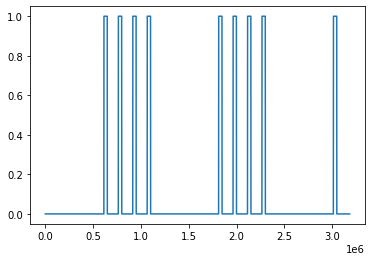

In [32]:
block_times = list()
stim_times = list()
stop_times = list()
for row in all_data0[0][0]:
    if row[-2][0] == "Block Start":
        block_times.append(row[0][0][0])
    elif row[-2][0] == "Stim Start":
        stim_times.append(row[0][0][0])
    elif row[-2][0] == "Stim Stop":
        stop_times.append(row[0][0][0])
last_index_prestim = np.where(time_eeg > block_times[0])[0][0] - 1
#     print(row[-2][0])
    
## Remove data after stimulation starts


trigger_eeg = np.zeros_like(time_eeg)
for s, e in zip(stim_times, stop_times):
    trigger_eeg[time_eeg > s] = 1
    trigger_eeg[time_eeg > e] = 0
plt.plot(trigger_eeg)

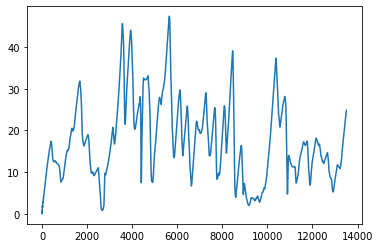

In [54]:
plt.plot(behavior[:last_index_prestim][::1])

In [60]:
all_data.shape

(35, 2692)

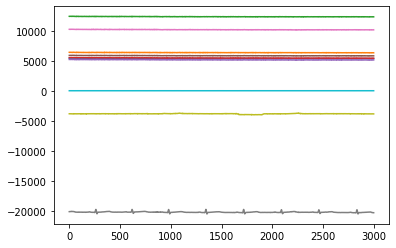

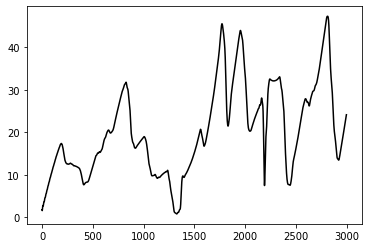

In [63]:
# all_data = all_data0[1][:, ::10][:, 2000:2000+3000]

start = 10
dfac = 2
all_data = all_data0[1][:, :last_index_prestim][:, ::dfac][:, start:start+3000]
true_data = all_data[:-4, :].T # include EEG only
true_data = all_data[:-1, :].T  # include EEG + ECG
true_data = all_data[:, :].T  # include EEG + ECG + respiration signal

true_data = all_data[25:, :].T  # include EEG + ECG + respiration signal

# driver = all_data[-1, :] # include EEG + ECG
# driver = all_data[:, :]
driver = behavior[:last_index_prestim][::dfac][start:start+3000]

plt.figure()
plt.plot(true_data);
# plt.plot(driver, 'k');
plt.figure()
plt.plot(driver, 'k');

true_data.dump("eeg2.pkl")
driver.dump("eeg2_drive.pkl")

## 

# DataHigh spiking

[Source](https://github.com/BenjoCowley/DataHigh/blob/master/data/ex1_spikecounts.mat)


Try time delaying label vector to see if anything interesting happens with subspace in the 
absence of external signa;

In [182]:
dpath = "/Users/williamgilpin/Downloads/ex1_spikecounts.mat"

import scipy.io
all_data = scipy.io.loadmat(dpath)

set1 = all_data["D"][0][0][0].T

# 210, 4, 61, 400
# task, ?, neurons, time

In [216]:
set1.dump("spiktest.pkl")

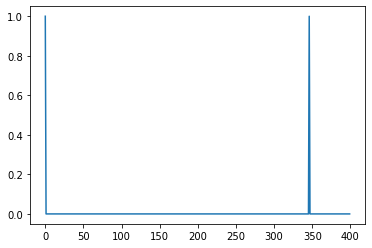

In [184]:
plt.plot(set1[:, 0]);

# Plankton data

Data [source](https://www.nature.com/articles/s41467-017-02571-4#Sec24)

In [43]:
import pandas as pd

DATA_PATH = "data/41467_2017_2571_MOESM4_ESM.xlsx"
DATA_PATH = "data/41467_2017_2571_MOESM6_ESM.xlsx"

data = pd.read_excel(DATA_PATH)
data = data.set_index("OTU")
data = data.transpose()

# Drop metadata in last row
data.drop(data.tail(1).index, inplace=True)

METADATA_PATH = "data/41467_2017_2571_MOESM10_ESM.xlsx"
metadata = pd.read_excel(METADATA_PATH)
metadata = metadata.set_index("OrdinalDay")
metadata.drop(metadata.tail(1).index, inplace=True)

/var/folders/g_/3gcjjjc12l9cjdh8drtctrdm0000gp/T/ipykernel_16800/2659096913.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata[key][np.array(metadata[key]) == "nd"] = None


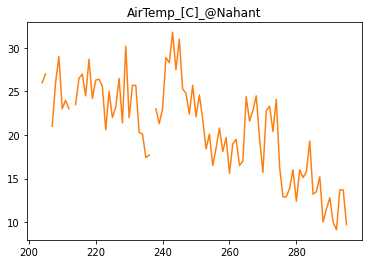

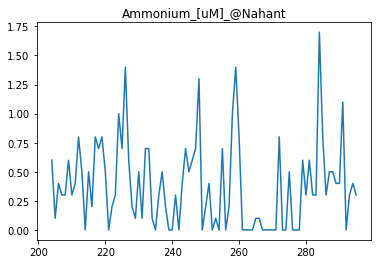

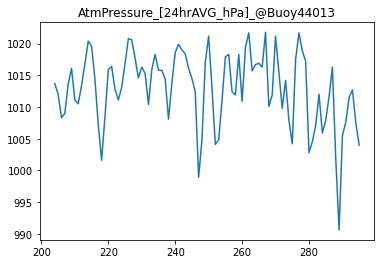

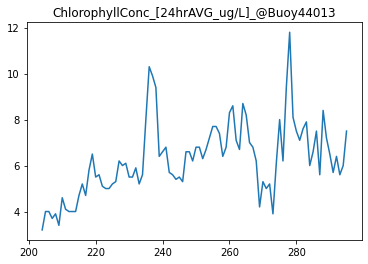

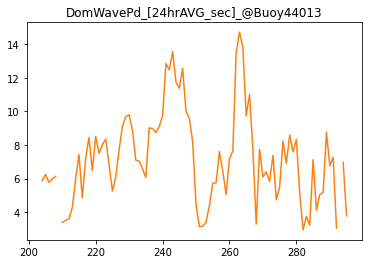

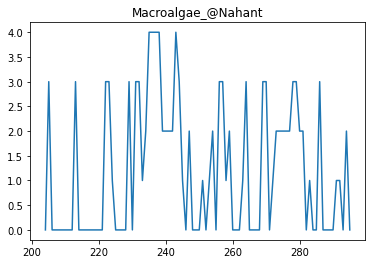

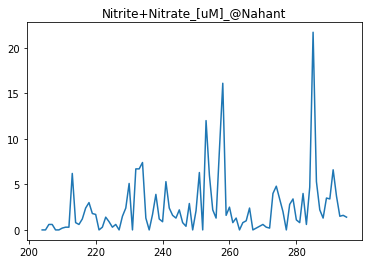

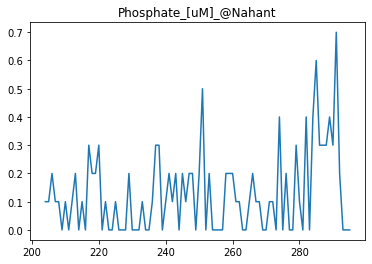

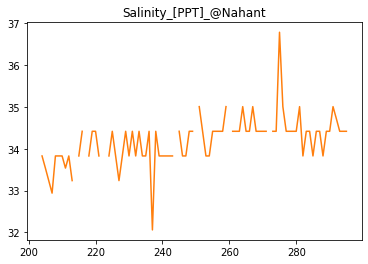

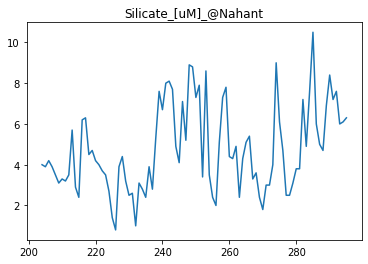

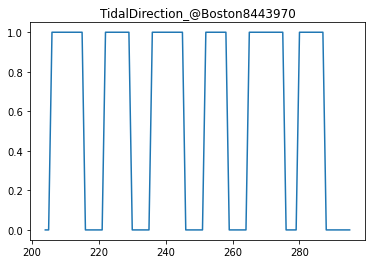

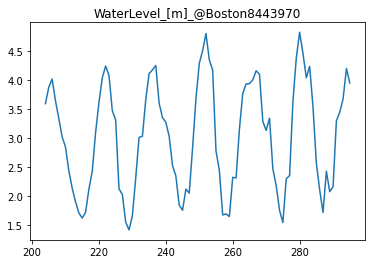

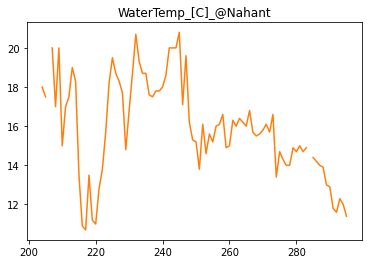

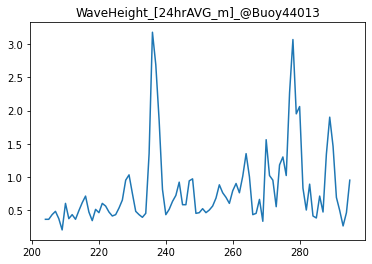

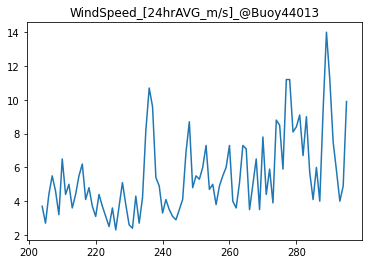

In [44]:
for key in metadata.keys():
    plt.figure()
    try:
        plt.plot(metadata[key])
    except:
        metadata[key][np.array(metadata[key]) == "nd"] = None
        plt.plot(metadata[key])
    plt.title(key)

In [ ]:
plt.plot(metadata[key])

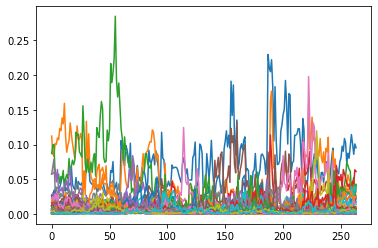

In [45]:
all_data = list()
for key in data.keys()[:50]: # pick 50 phyla
    data_vals = np.array([item for item in data[key]])
    all_data.append(data_vals)
    plt.plot(data_vals)
all_data = np.array(all_data)

In [54]:
all_data.dump("phytoplankton_species_abundances.pkl")

In [1]:
# plt.plot(data.iloc[:, 0])

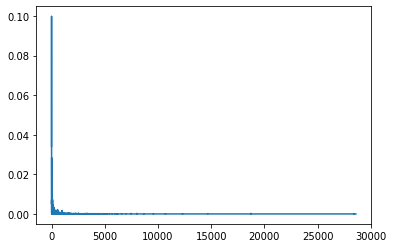

In [30]:
plt.plot(data.iloc[:, 3])

# Circadian Rhythm

Data from [here](https://www.sciencedirect.com/science/article/pii/S2667237521001065#fig4)
and [here](https://github.com/pepperhuang/heartrate)

In [58]:
data = pd.read_csv("data/1235_heartrate.txt", names=["time", "val"])
#, index_col=0

data2 = pd.read_csv("data/1235_steps.txt", names=["val", "device"])
data2 = data2.reset_index()

print(data.head(), "\n")
print(data2.head())

           time   val
0  1.500990e+09  74.0
1  1.500990e+09  69.0
2  1.500990e+09  81.0
3  1.500992e+09  73.0
4  1.500992e+09  91.0 

        level_0       level_1    val  device
0  1.500990e+09  1.500990e+09   60.0   Watch
1  1.500990e+09  1.500991e+09   89.0  iPhone
2  1.500991e+09  1.500991e+09    5.0  iPhone
3  1.500990e+09  1.500991e+09   74.0   Watch
4  1.500991e+09  1.500992e+09  131.0   Watch


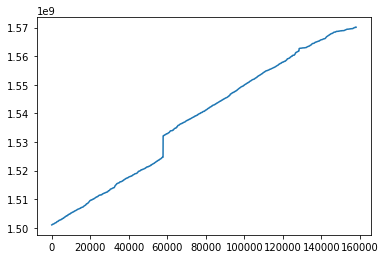

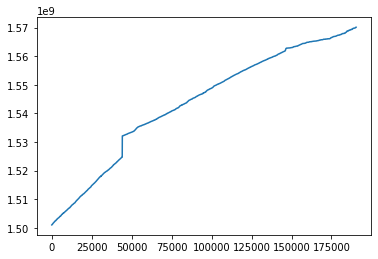

In [59]:
plt.figure()
plt.plot(data["time"])

plt.figure()
plt.plot(data2["level_0"])

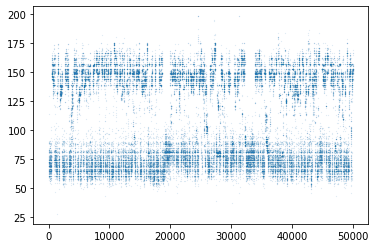

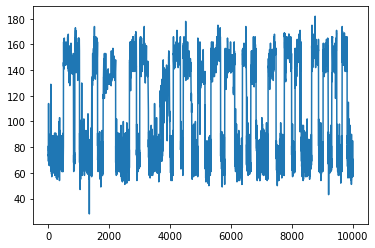

In [63]:
plt.figure()
plt.plot(data["val"][:50000], '.', markersize=0.1)

plt.figure()
plt.plot(data["val"][:10000])

In [245]:
from scipy.signal import periodogram
def group_consecutives(vals, step=1):
    """
    Return list of consecutive lists of numbers from vals (number list).
    
    References:
        Modified from the following
        https://stackoverflow.com/questions/7352684/
        how-to-find-the-groups-of-consecutive-elements-from-an-array-in-numpy 
    """
    run = list()
    result = [run]
    expect = None
    for v in vals:
        if (v == expect) or (expect is None):
            run.append(v)
        else:
            run = [v]
            result.append(run)
        expect = v + step
    return result

def find_psd(y, window=True):
    """
    Find the power spectrum of a signal
    """
    if window:
        y = y * blackmanharris(len(y))
    halflen = int(len(y)/2)
    fvals, psd = periodogram(y, fs=1)
    return fvals[:halflen], psd[:halflen]

from scipy.ndimage import gaussian_filter1d
from scipy.signal import periodogram, blackmanharris

def find_characteristic_timescale(y, k=1, window=True):
    """
    Find the k leading characteristic timescales in a time series
    using the power spectrum..
    """
    y = gaussian_filter1d(y, 3)

    fvals, psd = find_psd(y, window=window)
    # y = y * blackmanharris(len(y))
    # halflen = int(len(y)/2)
    # fvals, psd = periodogram(y, fs=1)
    max_indices = np.argsort(psd)[::-1]
    
    # Merge adjacent peaks
    grouped_maxima = group_consecutives(max_indices)
    max_indices_grouped = np.array([np.mean(item) for item in grouped_maxima])
    
    return np.squeeze(1/(np.median(np.diff(fvals))*max_indices_grouped[:k]))

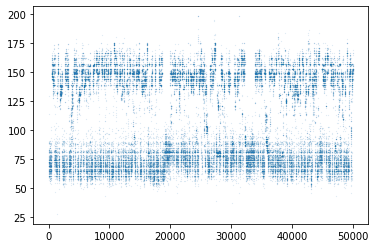

In [193]:
plt.plot(data["val"][:50000], '.', markersize=0.1)

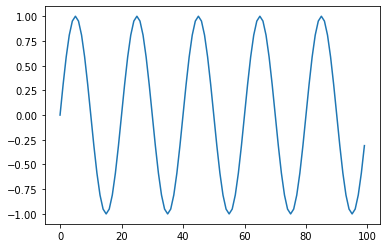

In [260]:
xx = np.arange(100)
plt.plot(xx, np.sin(2 * np.pi * xx/ 20))

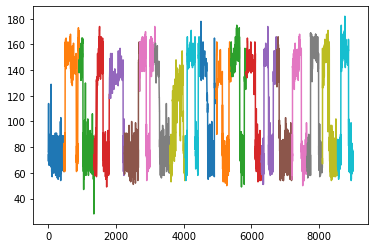

In [276]:
interval_length = 3 * 150
split_indices = np.arange(0, 1 + 50000//interval_length) * interval_length

for i in range(20):
    plt.plot(data["val"][i * interval_length : (i + 1) * interval_length])

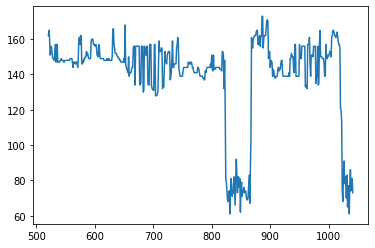

In [216]:
interval_length = 521
split_indices = np.arange(0, 1 + 50000//interval_length) * interval_length

plt.plot(data["val"][interval_length:2*interval_length])

In [228]:
chunked_data = [item for item in np.split(np.array(data["val"][:50000]), split_indices[1:])]
chunked_data = np.vstack(chunked_data[:-1])
# chunked_data.dump("test2.pkl")

In [282]:
chunked_data = [item for item in np.split(np.array(data2["val"][:20000]), 
                                          split_indices[1:])]
chunked_data = np.vstack(chunked_data[:20])
chunked_data.dump("test2.pkl")

# Neuron ensembles

Data from Kato et al

In [2]:
import h5py
def loadmat_v7(filepath):
    """
    A data loader for MATLAB .mat files that 
    scipy's data loader cannot accomodate
    
    Parameters
    ----------
    - filepath : str
        The location of a .mat file
    Returns
    -------
    - arrs : dict
        A dictionary with keys corresponding to fields, and
        values corresponding to arrays of data
    """
    arrs = {}
    f = h5py.File(filepath, 'r')
    for k, v in f.items():
        arrs[k] = np.array(v)
    return arrs

import scipy.io

arr = scipy.io.loadmat("data/elegans_neurons_wt_katocell2015.mat")["WT_Data_Cell2015"][0]
animal_index = 0
# max_len = min([len(item[1]) for item in arr])
# arr = np.hstack([item[0][:max_len] for item in arr])

In [3]:
from scipy.signal import savgol_filter

def load_pickle_file(filename):
    fr = open(filename, 'rb')
    data = pickle.load(fr)
    fr.close()
    return data

# def import_worm(worm_index=1, pc_index=0):
#     """
#     C elegans crawling postures, projected onto the first few 
#     independent components
#     https://www.biorxiv.org/content/10.1101/827535v1
#     https://bitbucket.org/tosifahamed/behavioral-state-space/
#     """
#     # pick the first component of non-nan
#     if worm_index==1:
#         data_full = np.load('/Users/william/Dropbox/attractor/code/resources/worm_behavior/data/worm_1.pkl', allow_pickle=True)
#         data = data_full[:29850, pc_index]
#     elif worm_index==5:
#         data_full = np.load('/Users/william/Dropbox/attractor/code/resources/worm_behavior/data/worm_5.pkl', allow_pickle=True)
#         data = data_full[10000:, pc_index]
#     data = (data - savgol_filter(data, 51, 1)) # detrend over long timescales
#     return data

def import_worm_neuro(worm_index=0, pc_index=[0]):
    """
    Import neuronal response data in C elegans
    Kato et al. Cell 2015
    worm_index : int, which animal/animal (0-4)
    pc_index : int or list of ints, which principal component(s) (0-108)
    """
    all_data = scipy.io.loadmat('data/elegans_neurons_wt_katocell2015.mat')
    all_pc = all_data['WT_Data_Cell2015'][0, worm_index][2][0][0][1]
    out = np.vstack(all_pc[:, pc_index])
    return out.T

data = import_worm_neuro(0, range(100)).T
# plt.plot(np.var(data, axis=1))
# data.dump("test3.pkl")

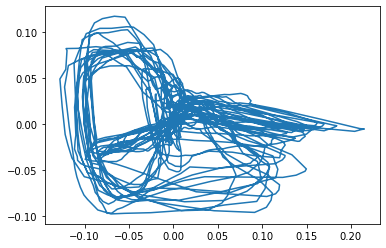

In [393]:
# plt.plot(data[0], data[1])

# Mouse head direction

Data from Chaudhuri et al

In [6]:


def import_neural(neuron_index=3, dtype="rates"):
    """
    Chaudhuri et al Nature Neuroscience 2019
    'rates' gives the spiking rate of individual neurons
    'ang' gives the measured angle of the head
    http://crcns.org/data-sets/thalamus/th-1/about-th-1
    Each trace corresponds to spiking rates for a different neuron
    """
    data_dir = "/Users/williamgilpin/Dropbox (Personal)/attractor/code/resources/analyses/2019_03_kernel_rates/100ms_sigma/Mouse28-140313.p"
    d = load_pickle_file(data_dir)
    d2 = d['Wake'][(5565.0,7851.4)][dtype]
    ## Single neuron spike rate data
    key = list(d2.keys())[neuron_index] # a shorter dataset
    data = d2[key]
    # data = scipy.signal.savgol_filter(data, 101, 3)
    # data = (data - savgol_filter(data, 101, 1))
    
    # ## mean activity
    # all_spikes = list()
    # for item in d2:
    #     all_spikes.append(d2[item])
    # all_spikes = np.array(all_spikes)    
    # data = np.mean(all_spikes, axis=0)
    # data = (data - savgol_filter(data, 51, 1))

    return data

data = np.vstack([import_neural(neuron_index=i) for i in range(62)]).T
# data.dump("test4.pkl")

In [14]:
data_dir = "/Users/williamgilpin/Dropbox (Personal)/attractor/code/resources/analyses/2019_03_kernel_rates/100ms_sigma/Mouse28-140313.p"
d = load_pickle_file(data_dir)
# d = d['Wake'][(5565.0,7851.4)]#['ang']

# electrode_inds = d['Wake'][(5565.0,7851.4)]["rates"].keys()
# plt.plot(*np.array(list(electrode_inds)).T, '.')

# cell_inds = np.array(d['cells'])
# plt.plot(*np.array(list(cell_inds)).T, '.')

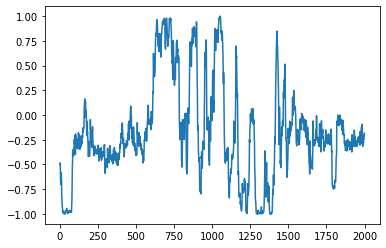

In [22]:
plt.plot(np.sin(d['Wake'][(5565.0,7851.4)]["angles"][:2000]))

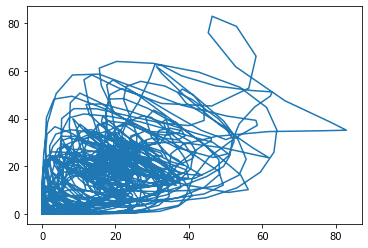

In [15]:
qq = d['Wake'][(5565.0,7851.4)]["rates"][(0,0)]
plt.plot(qq[:2000][5:], qq[:2000][:-5])

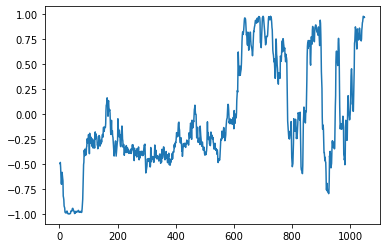

In [99]:
plt.plot(np.sin(d["angles"][:1050]))

# Fetal ECG

Data from [PhysioNet](https://physionet.org/content/ninfea/1.0.0/)

"In these files, the first 24 rows are associated to unipolar channels, gathering the signals from 24 electrodes placed on the maternal abdomen and back, rows from 25 to 27 are associated to differential channels gathering the signals from six electrodes positioned on the maternal thorax, for recording the maternal ECG, rows from 28-31 are associated to unused channels, row 32 is the maternal respiration signal, row 33 is an internal saw-tooth signal and row 34 is associated to the trigger signal used for synchronisation."

In [5]:
dat_path = "/Users/williamgilpin/Downloads/ninfea-non-invasive-multimodal-foetal-ecg-doppler-dataset-for-antenatal-cardiology-research-1.0.0 2/wfdb_format_ecg_and_respiration/1.dat"
hea_path = "/Users/williamgilpin/Downloads/ninfea-non-invasive-multimodal-foetal-ecg-doppler-dataset-for-antenatal-cardiology-research-1.0.0 2/wfdb_format_ecg_and_respiration/1.hea"


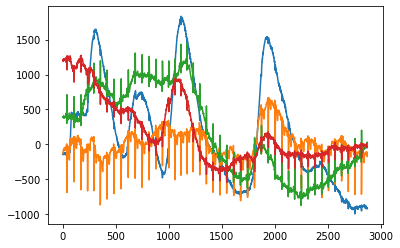

In [70]:
plt.plot(record2.p_signal[:, 23:27][::20])

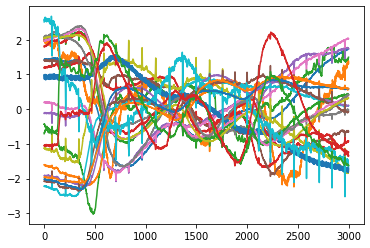

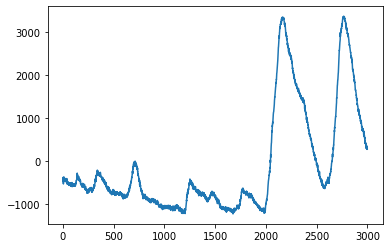

In [70]:
import wfdb

data_dir = "/Users/williamgilpin/Downloads/"
data_dir += "ninfea-non-invasive-multimodal-foetal-ecg-doppler-dataset-for-antenatal-cardiology-research-1.0.0/"
data_dir += "wfdb_format_ecg_and_respiration/1"

# Can also read the same files hosted on PhysioNet https://physionet.org/content/challenge-2015/1.0.0
# in the /training/ database subdirectory.
record2 = wfdb.rdrecord(data_dir)

# ecg_data = record2.p_signal[:, :24][::20]
# ecg_data = record2.p_signal[:, :27][::20]
ecg_data = record2.p_signal[:, :24][::10][:3000]
resp_signal = record2.p_signal[:, -3][::10][:3000]


# resp_signal = record2.p_signal[:, 25][::20][:3000]
# import imageio
# impath = "/Users/williamgilpin/Downloads/1.bmp"
# im = imageio.imread(impath)
# resp_signal = np.mean(np.mean(im, axis=-1), axis=0)
# from scipy.signal import resample
# resp_signal = resample(resp_signal, ecg_data.shape[0])




ecg_data.dump("ecg.pkl")
resp_signal.dump("resp.pkl")

plt.figure()
plt.plot(standardize_ts(ecg_data));

plt.figure()
plt.plot(resp_signal);

In [83]:
# https://physionet.org/content/adfecgdb/1.0.0/
dpath = "/Users/williamgilpin/Downloads/abdominal-and-direct-fetal-ecg-database-1.0.0/r04.edf"

import mne

data = mne.io.read_raw_edf(dpath)
raw_data = data.get_data()
# you can get the metadata included in the file and a list of all channels:
info = data.info
channels = data.ch_names

print(channels)


Extracting EDF parameters from /Users/williamgilpin/Downloads/abdominal-and-direct-fetal-ecg-database-1.0.0/r04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
['Direct_1', 'Abdomen_1', 'Abdomen_2', 'Abdomen_3', 'Abdomen_4']


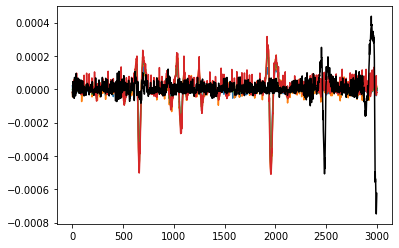

In [88]:
ecg_data = raw_data[1:]
drive_signal = raw_data[0]

ecg_data = ecg_data[:, ::30][:, :3000]
drive_signal = drive_signal[::30][:3000]

plt.plot(ecg_data.T);
plt.plot(drive_signal, 'k')

ecg_data.T.dump("ecg2.pkl")
drive_signal.dump("drive_ecg2.pkl")

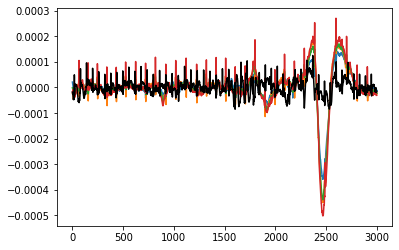

In [86]:
plt.plot(ecg_data.T);
plt.plot(drive_signal, 'k')

# Gyre

In [18]:
dpath = "/Users/williamgilpin/Downloads/gyre.pkl"

all_data = np.load(dpath, allow_pickle=True)
true_driver = all_data[0, 0, -1]
true_data = all_data[:, :, 0]



(32, 3000, 3)

# Stonks

/var/folders/g_/3gcjjjc12l9cjdh8drtctrdm0000gp/T/ipykernel_16800/759952718.py:25: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Close_x'} in the result is deprecated and will raise a MergeError in a future version.
  lambda  left, right: pd.merge(left, right ,on=['Date'], how='outer'),


0


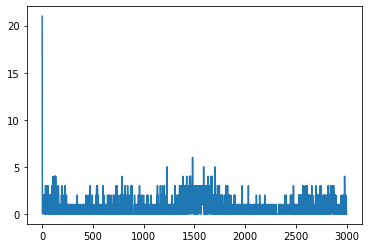

In [333]:
dpath = "big_data/stock/1 Day/Stocks/"
import glob
import os.path

all_data = list()
all_paths = sorted(glob.glob(os.path.join(dpath, "*")))
t_lookback = 3000
ticker_names = list()

np.random.seed(0)
for i, path in enumerate(np.random.choice(all_paths, 1000, replace=False)):
    
    df = pd.read_csv(path)
    df = df.set_index("Date")
    
    tname = os.path.basename(path).split(".")[0]
    ticker_names.append(tname)
    
    df['Ticker'] = pd.Series([tname for x in range(len(df.index))])
    all_data.append(df["Close"][-(t_lookback):])


from functools import reduce
df_merged = reduce(
    lambda  left, right: pd.merge(left, right ,on=['Date'], how='outer'), 
    all_data
)
df_merged.set_axis(ticker_names, axis=1, inplace=True)
where_nan = np.sum(np.isnan(df_merged.to_numpy()), axis=0)
df_merged = df_merged.iloc[:, np.argsort(where_nan)[:200]] # drop worst equities

df_merged =df_merged.iloc[:t_lookback, :]

plt.plot(np.sum(np.isnan(df_merged.to_numpy()), axis=1))

df_merged = df_merged.fillna(method="bfill").transpose()
# df_merged = df_merged.transpose()

true_data = df_merged.to_numpy().T
print(np.sum(np.isnan(true_data)))
# true_data.dump("stocks.pkl")

In [334]:
true_data.dump("stocks.pkl")

In [ ]:
# true_data.dump("stocks.pkl")

# Turbulence

Tracers in forced turbulence

# Plankton II


[Source](https://portal.aodn.org.au/search)
dpath = "/Users/williamgilpin/program_repos/recur/resources/The_Australian_Phytoplankton_Database_(1844_-_ongoing)_-_abundance_and_biovolume.csv"

pd.read_csv(dpath) 


In [338]:
dpath = "/Users/williamgilpin/Downloads/obis_20220114.csv"

pd.read_csv(dpath, nrows=100)

,id,dataset_id,decimallongitude,decimallatitude,date_start,date_mid,date_end,date_year,scientificname,originalscientificname,...,higherclassification,specificepithet,infraspecificepithet,verbatimtaxonrank,scientificnameauthorship,vernacularname,nomenclaturalcode,taxonomicstatus,nomenclaturalstatus,taxonremarks
0,8cbe1000-6b6b-4014-b887-2ae309c9b26b,d69a1913-4536-4e23-ae6b-911c6359cc61,123.735700,-57.104200,NaN,NaN,NaN,NaN,Copepoda,Copepoda nauplius indet,...,NaN,NaN,NaN,NaN,"Milne Edwards, 1840",NaN,NaN,NaN,NaN,NaN
1,4be005a6-52fd-458d-8ea1-3be39b8d67c0,89e23fc8-3f61-4480-9de3-358fe6eefe0b,-80.886673,31.393330,3.585600e+11,3.585600e+11,3.585600e+11,1981.0,Trididemnum savignii,Trididemnum savignii,...,NaN,NaN,NaN,NaN,(Herdman),NaN,NaN,NaN,NaN,NaN
2,b98b915f-a8bd-4fab-8864-4687b05e4aad,89e23fc8-3f61-4480-9de3-358fe6eefe0b,-82.639168,26.279720,3.443904e+11,3.443904e+11,3.443904e+11,1980.0,Aricidea (Acmira),Aricidea (acmira) sp.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,d838f7f0-f908-4f40-92c0-2105917b8dc5,89e23fc8-3f61-4480-9de3-358fe6eefe0b,-79.417000,32.266998,2.997216e+11,2.997216e+11,2.997216e+11,1979.0,Amerolaophontina reducta,Laophontina reducta,...,NaN,NaN,NaN,NaN,Coull & Zo,NaN,NaN,NaN,NaN,NaN
4,a50cf8a0-849e-42b3-b1d8-d67409374002,89e23fc8-3f61-4480-9de3-358fe6eefe0b,-70.449997,40.033329,-2.733005e+12,-2.733005e+12,-2.733005e+12,1883.0,Pennatula aculeata,Pennatula aculeata,...,NaN,NaN,NaN,NaN,Danielssen,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,77adc61e-8aca-4ef8-9eab-60ae882e0e50,89e23fc8-3f61-4480-9de3-358fe6eefe0b,-66.930000,40.983330,3.821472e+11,3.821472e+11,3.821472e+11,1982.0,Spiophanes bombyx,Spiophanes bombyx,...,NaN,NaN,NaN,NaN,(Claparede),NaN,NaN,NaN,NaN,NaN
96,ce9b8505-c6b2-4ba4-983e-901401bed9e7,d69a1913-4536-4e23-ae6b-911c6359cc61,110.000700,-51.649100,NaN,NaN,NaN,NaN,Copepoda,Copepoda nauplius indet,...,NaN,NaN,NaN,NaN,"Milne Edwards, 1840",NaN,NaN,NaN,NaN,NaN
97,93c66dbe-e677-428f-a232-bacda5d503af,d69a1913-4536-4e23-ae6b-911c6359cc61,110.000000,-51.732400,NaN,NaN,NaN,NaN,Copepoda,Copepoda nauplius indet,...,NaN,NaN,NaN,NaN,"Milne Edwards, 1840",NaN,NaN,NaN,NaN,NaN
98,4b8de2a8-1ae6-4447-948a-aafa9370c7d1,89e23fc8-3f61-4480-9de3-358fe6eefe0b,-67.254997,41.216671,3.960576e+11,3.960576e+11,3.960576e+11,1982.0,Spiophanes bombyx,Spiophanes bombyx,...,NaN,NaN,NaN,NaN,(Claparede),NaN,NaN,NaN,NaN,NaN


# Electricity Usage


In [69]:
def import_electricity():
    """
    Samples are different clients, and indices are kWh used in 15 min increments
    35040 timesteps correspond to one year. Dataset starts on 1/1/2011
    """
    # df = pd.read_csv('resources/electricity/LD2011_2014.txt', sep=';', skiprows=0)
    
    # all_data = list()
    # for col_name in df.columns[1:]:
    #     all_data.append(np.array([str(item).replace(',','.') for item in df[col_name].values]).astype(np.float))
    # all_data = np.array(all_data)
    dpath = "/Users/williamgilpin/Dropbox (Personal)/attractor/code/resources/electricity/electricity_data.pkl"
    all_data = np.load(dpath, allow_pickle=True)
    
    all_data_nan = np.copy(all_data)
    all_data_nan[all_data==0]=np.nan
    
    # datasets have lots of missing values, so pool by median
    data = np.nanmean(all_data_nan, axis=0)

    #data = scipy.signal.medfilt(data, 5)
    
    #data = (data - savgol_filter(data, 501, 1)) # remove yearly trend
    # data = (data - savgol_filter(data, 1 + 4*24*30*12, 1)) # remove yearly trend

    # individual usage
    #data = all_data_nan[1, 35040:113667]
    
    return data

In [4]:
import pandas as pd
dpath = "/Users/williamgilpin/Dropbox (Personal)/attractor/code/resources/electricity/electricity_data.pkl"
all_data = np.load(dpath, allow_pickle=True)

# all_data_nan = np.copy(all_data)
# all_data_nan[all_data==0]=np.nan

data = pd.DataFrame(all_data.T)
data.interpolate(inplace=True, method='linear')

In [14]:
true_data = data.to_numpy()[::1][-3000:]
true_data.dump("data_elec.pkl")

In [5]:
plt.plot(np.mean(true_data[:], axis=1))

NameError: name 'true_data' is not defined

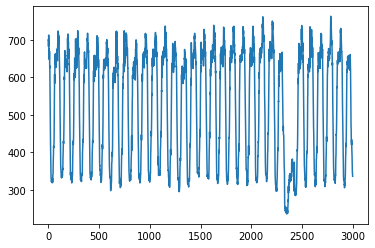

In [13]:
plt.plot(true_data.mean(axis=1)[:5000])

In [ ]:
true_data

# test

In [ ]:
p = "/Users/williamgilpin/Downloads/s1-kinematics/reaching_experiments/C_20170907_TRT_TD.mat"

